In [1]:
shape_cat=""
vol=""
z_range=""

In [2]:
# Parameters
shape_cat = "mcal"
vol = "all"
z_range = "all_z"


In [3]:
#This header file contains all the common packages
%matplotlib inline
%run /home/cz136/project/sa/lib/src/header.py $shape_cat $vol $z_range 
%run -i /home/cz136/project/sa/lib/src/func.py  

In [4]:
sep="------------------------------------------------------------------------------"
np.set_printoptions(precision=4)

In [5]:
NBINS=10

In [6]:
import treecorr
import astropy.cosmology
from fastprogress import master_bar, progress_bar
from ipywidgets import FloatProgress
from IPython.display import display
from tqdm import tqdm

In [7]:
assert np.isin(shapes['All','MEM_MATCH_ID'].to_numpy(),clusters.index.to_numpy()).all()==True

In [8]:
def get_ng(cluster,mode1,mode2):
    if mode2=="abs":
        UPPER_BOUND=np.max(shapes[('All','R')])
        distance=('All','angR')
        
    elif mode2=="rel":
        UPPER_BOUND=1.2
        distance=('All','normLR')
    else:
        raise

    if mode1 == "s":
        def get_cluster_cen(cluster):
            return (get_unique_center_for_cluster(cluster))
        def get_cluster_sats(cluster):
            cen_mat_id=cluster.name
            cen_id=cluster[('Alt','Alt1','ID_CENT')]
            sats=shapes[shapes['All','MEM_MATCH_ID']==cen_mat_id]
            sats=sats[sats.index!=cen_id]
            return (sats)
    elif mode1=='r':
        def get_cluster_sats(cluster):
            return(shapes)
        def get_cluster_cen(cluster):
            return (random)

    else:
        raise


    cen=get_cluster_cen(cluster)
    sats=get_cluster_sats(cluster)


    sats_e1=sats[('All','e1')].to_numpy()
    sats_e2=sats[('All','e2')].to_numpy()
    sats_angr=sats[distance]

#     print(sats_e1,sats_e2)

    if type(cen[('All','RA')])==np.float64:
        cen_angr=np.array(cen[distance]).reshape(1)
        cen_ra=np.array(cen[('All','RA')]).reshape(1)
        cen_dec=np.array(cen[('All','DEC')]).reshape(1)
    else:
#         cen_e1=cen[('All','e1')].to_numpy
#         cen_e2=cen[('All','e2')].to_numpy()
        cen_angr=cen[distance].to_numpy()
        cen_ra=cen[('All','RA')].to_numpy()
        cen_dec=cen[('All','DEC')].to_numpy()




#     print(cen_e1,cen_e2)

    sats_ra=sats[('All','RA')].to_numpy()
    sats_dec=sats[('All','DEC')].to_numpy()




#     print(np.shape(cen_ra),np.shape(cen_dec))    
#     print(cen_ra,cen_dec)    

    sats_cat = treecorr.Catalog( g1 = sats_e1, g2   = sats_e2, 
                                 ra = sats_ra, dec = sats_dec,r=sats_angr,
                                 ra_units='deg', dec_units='deg')

    cen_cat = treecorr.Catalog( 
                                 ra = cen_ra, dec = cen_dec, r=cen_angr,
                                 ra_units='deg', dec_units='deg')

    ng = treecorr.NGCorrelation(nbins=NBINS, min_sep=0.01, max_sep=UPPER_BOUND, bin_slop=0.0,
                               metric="Rperp")
    ng.process_cross(cen_cat,sats_cat)

    return(ng)

In [9]:
def get_xi_meanlogr_varxi_npairs(cluster,mode1,mode2):
    ng=get_ng(cluster,mode1,mode2)
    return(np.array([ng.xi,ng.meanlogr,ng.varxi,ng.npairs]))

In [10]:
length=len(clusters)

def get_ng_list(mode2):
    ng_list=np.empty([length,4,NBINS])
    filler=np.zeros([1,4,NBINS])

    i=0
    e_count=0
    for index,cluster in tqdm(clusters.iterrows()):
        try:
            ng_list[i,:,:]=get_xi_meanlogr_varxi_npairs(cluster,'s',mode2)
            i=i+1
        except ValueError as e:
            ng_list[i,:,:]=filler
            i=i+1
            e_count=e_count+1
    print("Number of empty sat catalogs is {}".format(e_count))
    return (ng_list)

In [11]:
ng_abs=get_ng_list('abs')
ng_rel=get_ng_list('rel')

0it [00:00, ?it/s]

1it [00:00,  1.72it/s]

13it [00:00,  2.44it/s]

23it [00:00,  3.45it/s]

34it [00:00,  4.86it/s]

45it [00:01,  6.80it/s]

57it [00:01,  9.47it/s]

68it [00:01, 13.01it/s]

78it [00:01, 17.30it/s]

87it [00:01, 22.76it/s]

96it [00:01, 28.63it/s]

108it [00:01, 36.87it/s]

119it [00:01, 46.00it/s]

131it [00:01, 55.80it/s]

143it [00:02, 65.45it/s]

154it [00:02, 71.48it/s]

166it [00:02, 79.99it/s]

177it [00:02, 86.02it/s]

188it [00:02, 90.83it/s]

199it [00:02, 94.78it/s]

211it [00:02, 99.13it/s]

223it [00:02, 102.36it/s]

234it [00:02, 104.19it/s]

245it [00:02, 104.45it/s]

256it [00:03, 104.61it/s]

267it [00:03, 99.28it/s] 

278it [00:03, 100.85it/s]

289it [00:03, 101.86it/s]

300it [00:03, 102.58it/s]

312it [00:03, 106.07it/s]

324it [00:03, 108.45it/s]

336it [00:03, 110.10it/s]

348it [00:03, 111.67it/s]

360it [00:04, 112.23it/s]

372it [00:04, 111.38it/s]

384it [00:04, 111.28it/s]

396it [00:04, 105.95it/s]

407it [00:04, 105.24it/s]

419it [00:04, 107.94it/s]

431it [00:04, 109.30it/s]

443it [00:04, 110.18it/s]

455it [00:04, 110.59it/s]

467it [00:05, 111.16it/s]

479it [00:05, 104.44it/s]

490it [00:05, 102.44it/s]

502it [00:05, 105.10it/s]

514it [00:05, 107.36it/s]

526it [00:05, 108.84it/s]

538it [00:05, 109.84it/s]

550it [00:05, 110.46it/s]

562it [00:05, 110.89it/s]

574it [00:06, 111.10it/s]

586it [00:06, 106.59it/s]

597it [00:06, 107.58it/s]

608it [00:06, 108.14it/s]

620it [00:06, 108.88it/s]

632it [00:06, 109.59it/s]

644it [00:06, 110.04it/s]

656it [00:06, 102.63it/s]

667it [00:06, 102.72it/s]

679it [00:07, 105.84it/s]

691it [00:07, 108.18it/s]

703it [00:07, 109.65it/s]

715it [00:07, 105.78it/s]

726it [00:07, 106.99it/s]

738it [00:07, 108.28it/s]

750it [00:07, 109.14it/s]

762it [00:07, 109.64it/s]

773it [00:07, 109.65it/s]

784it [00:07, 103.01it/s]

796it [00:08, 105.13it/s]

808it [00:08, 106.78it/s]

820it [00:08, 108.64it/s]

832it [00:08, 109.63it/s]

844it [00:08, 110.49it/s]

856it [00:08, 110.30it/s]

868it [00:08, 111.22it/s]

880it [00:08, 112.28it/s]

892it [00:08, 102.87it/s]

903it [00:09, 100.75it/s]

915it [00:09, 103.54it/s]

927it [00:09, 105.87it/s]

939it [00:09, 108.12it/s]

951it [00:09, 108.94it/s]

963it [00:09, 109.77it/s]

975it [00:09, 109.42it/s]

986it [00:09, 106.58it/s]

997it [00:09, 107.37it/s]

1009it [00:10, 109.07it/s]

1020it [00:10, 106.61it/s]

1032it [00:10, 108.66it/s]

1044it [00:10, 109.55it/s]

1055it [00:10, 105.03it/s]

1067it [00:10, 103.59it/s]

1078it [00:10, 103.27it/s]

1090it [00:10, 106.08it/s]

1102it [00:10, 108.36it/s]

1114it [00:11, 109.61it/s]

1126it [00:11, 110.24it/s]

1138it [00:11, 107.52it/s]

1149it [00:11, 107.69it/s]

1160it [00:11, 107.14it/s]

1172it [00:11, 108.33it/s]

1183it [00:11, 108.36it/s]

1195it [00:11, 108.92it/s]

1206it [00:11, 108.63it/s]

1218it [00:12, 109.36it/s]

1230it [00:12, 109.55it/s]

1241it [00:12, 109.67it/s]

1252it [00:12, 109.64it/s]

1263it [00:12, 109.67it/s]

1274it [00:12, 106.21it/s]

1286it [00:12, 107.64it/s]

1298it [00:12, 109.23it/s]

1310it [00:12, 110.52it/s]

1322it [00:12, 109.38it/s]

1333it [00:13, 99.18it/s] 

1345it [00:13, 101.99it/s]

1356it [00:13, 103.59it/s]

1367it [00:13, 104.78it/s]

1379it [00:13, 106.54it/s]

1390it [00:13, 107.09it/s]

1401it [00:13, 104.21it/s]

1412it [00:13, 105.64it/s]

1423it [00:13, 105.54it/s]

1434it [00:14, 104.60it/s]

1445it [00:14, 103.34it/s]

1456it [00:14, 94.23it/s] 

1467it [00:14, 98.26it/s]

1479it [00:14, 101.69it/s]

1490it [00:14, 97.47it/s] 

1502it [00:14, 101.76it/s]

1513it [00:14, 103.99it/s]

1525it [00:14, 105.86it/s]

1537it [00:15, 107.59it/s]

1549it [00:15, 108.72it/s]

1560it [00:15, 104.06it/s]

1571it [00:15, 105.04it/s]

1582it [00:15, 90.21it/s] 

1592it [00:15, 85.23it/s]

1601it [00:15, 81.40it/s]

1610it [00:15, 78.76it/s]

1619it [00:16, 77.13it/s]

1628it [00:16, 79.82it/s]

1639it [00:16, 85.30it/s]

1650it [00:16, 89.26it/s]

1661it [00:16, 92.47it/s]

1672it [00:16, 95.29it/s]

1682it [00:16, 96.60it/s]

1693it [00:16, 97.84it/s]

1703it [00:16, 94.44it/s]

1715it [00:17, 99.05it/s]

1727it [00:17, 102.42it/s]

1738it [00:17, 88.98it/s] 

1748it [00:17, 80.02it/s]

1760it [00:17, 87.85it/s]

1772it [00:17, 94.06it/s]

1784it [00:17, 99.24it/s]

1796it [00:17, 102.90it/s]

1808it [00:17, 106.12it/s]

1820it [00:18, 108.10it/s]

1832it [00:18, 109.01it/s]

1844it [00:18, 107.55it/s]

1855it [00:18, 108.13it/s]

1867it [00:18, 110.09it/s]

1879it [00:18, 109.81it/s]

1891it [00:18, 107.39it/s]

1902it [00:18, 102.29it/s]

1913it [00:18, 102.64it/s]

1924it [00:19, 102.57it/s]

1935it [00:19, 101.92it/s]

1946it [00:19, 101.63it/s]

1957it [00:19, 101.97it/s]

1969it [00:19, 105.25it/s]

1981it [00:19, 107.62it/s]

1993it [00:19, 109.44it/s]

2005it [00:19, 110.96it/s]

2017it [00:19, 111.33it/s]

2029it [00:20, 111.31it/s]

2041it [00:20, 111.00it/s]

2053it [00:20, 107.96it/s]

2065it [00:20, 108.27it/s]

2076it [00:20, 108.02it/s]

2088it [00:20, 109.56it/s]

2100it [00:20, 110.01it/s]

2112it [00:20, 110.13it/s]

2124it [00:20, 110.40it/s]

2136it [00:20, 110.96it/s]

2148it [00:21, 107.75it/s]

2160it [00:21, 108.60it/s]

2172it [00:21, 110.01it/s]

2184it [00:21, 110.12it/s]

2196it [00:21, 111.11it/s]

2208it [00:21, 110.94it/s]

2220it [00:21, 110.38it/s]

2232it [00:21, 110.22it/s]

2244it [00:21, 109.36it/s]

2255it [00:22, 108.90it/s]

2267it [00:22, 109.53it/s]

2278it [00:22, 108.13it/s]

2289it [00:22, 108.64it/s]

2300it [00:22, 107.67it/s]

2311it [00:22, 107.77it/s]

2322it [00:22, 108.35it/s]

2334it [00:22, 109.95it/s]

2346it [00:22, 109.55it/s]

2357it [00:23, 108.70it/s]

2368it [00:23, 108.16it/s]

2379it [00:23, 107.12it/s]

2390it [00:23, 107.41it/s]

2402it [00:23, 109.01it/s]

2413it [00:23, 109.03it/s]

2424it [00:23, 108.29it/s]

2435it [00:23, 108.60it/s]

2446it [00:23, 104.34it/s]

2457it [00:23, 97.11it/s] 

2467it [00:24, 97.02it/s]

2477it [00:24, 97.50it/s]

2488it [00:24, 99.29it/s]

2499it [00:24, 101.20it/s]

2511it [00:24, 104.87it/s]

2523it [00:24, 106.94it/s]

2535it [00:24, 108.01it/s]

2546it [00:24, 105.94it/s]

2558it [00:24, 107.61it/s]

2570it [00:25, 108.76it/s]

2582it [00:25, 109.61it/s]

2594it [00:25, 110.02it/s]

2606it [00:25, 108.08it/s]

2618it [00:25, 109.43it/s]

2629it [00:25, 109.37it/s]

2641it [00:25, 109.71it/s]

2652it [00:25, 109.72it/s]

2663it [00:25, 105.74it/s]

2675it [00:26, 107.54it/s]

2686it [00:26, 97.08it/s] 

2697it [00:26, 100.46it/s]

2708it [00:26, 103.06it/s]

2719it [00:26, 103.84it/s]

2730it [00:26, 105.31it/s]

2741it [00:26, 105.47it/s]

2752it [00:26, 89.87it/s] 

2762it [00:26, 92.63it/s]

2773it [00:27, 97.16it/s]

2784it [00:27, 96.13it/s]

2796it [00:27, 100.14it/s]

2807it [00:27, 102.89it/s]

2818it [00:27, 104.43it/s]

2829it [00:27, 105.81it/s]

2840it [00:27, 104.96it/s]

2852it [00:27, 106.66it/s]

2863it [00:27, 107.34it/s]

2874it [00:27, 108.02it/s]

2886it [00:28, 108.80it/s]

2897it [00:28, 105.33it/s]

2908it [00:28, 105.36it/s]

2919it [00:28, 102.74it/s]

2930it [00:28, 104.39it/s]

2942it [00:28, 106.83it/s]

2954it [00:28, 108.14it/s]

2965it [00:28, 107.95it/s]

2976it [00:28, 107.40it/s]

2987it [00:29, 107.39it/s]

2998it [00:29, 105.07it/s]

3009it [00:29, 94.56it/s] 

3020it [00:29, 98.54it/s]

3031it [00:29, 101.25it/s]

3042it [00:29, 103.67it/s]

3053it [00:29, 104.54it/s]

3064it [00:29, 105.39it/s]

3075it [00:29, 105.70it/s]

3086it [00:29, 106.11it/s]

3097it [00:30, 94.52it/s] 

3107it [00:30, 88.08it/s]

3117it [00:30, 87.00it/s]

3127it [00:30, 89.52it/s]

3138it [00:30, 94.17it/s]

3149it [00:30, 98.02it/s]

3161it [00:30, 101.02it/s]

3172it [00:30, 103.09it/s]

3183it [00:31, 101.03it/s]

3194it [00:31, 100.46it/s]

3205it [00:31, 102.25it/s]

3216it [00:31, 100.73it/s]

3227it [00:31, 102.52it/s]

3238it [00:31, 103.14it/s]

3249it [00:31, 103.71it/s]

3261it [00:31, 105.83it/s]

3273it [00:31, 107.36it/s]

3284it [00:31, 107.84it/s]

3296it [00:32, 108.66it/s]

3308it [00:32, 109.68it/s]

3319it [00:32, 101.33it/s]

3330it [00:32, 99.83it/s] 

3341it [00:32, 100.15it/s]

3352it [00:32, 101.46it/s]

3363it [00:32, 103.14it/s]

3374it [00:32, 103.82it/s]

3385it [00:32, 104.62it/s]

3396it [00:33, 105.53it/s]

3407it [00:33, 104.72it/s]

3418it [00:33, 105.32it/s]

3429it [00:33, 106.66it/s]

3441it [00:33, 108.18it/s]

3453it [00:33, 109.43it/s]

3464it [00:33, 109.32it/s]

3476it [00:33, 109.90it/s]

3488it [00:33, 109.89it/s]

3499it [00:34, 105.97it/s]

3511it [00:34, 107.35it/s]

3523it [00:34, 109.03it/s]

3535it [00:34, 110.16it/s]

3547it [00:34, 111.54it/s]

3559it [00:34, 112.07it/s]

3571it [00:34, 112.06it/s]

3583it [00:34, 111.31it/s]

3595it [00:34, 111.72it/s]

3607it [00:34, 111.96it/s]

3619it [00:35, 112.67it/s]

3631it [00:35, 111.86it/s]

3643it [00:35, 110.89it/s]

3655it [00:35, 105.74it/s]

3666it [00:35, 93.99it/s] 

3676it [00:35, 95.11it/s]

3688it [00:35, 99.73it/s]

3700it [00:35, 103.01it/s]

3712it [00:36, 106.25it/s]

3724it [00:36, 108.18it/s]

3735it [00:36, 107.27it/s]

3746it [00:36, 107.97it/s]

3758it [00:36, 108.90it/s]

3770it [00:36, 109.98it/s]

3782it [00:36, 110.28it/s]

3794it [00:36, 110.18it/s]

3806it [00:36, 110.22it/s]

3818it [00:36, 110.65it/s]

3830it [00:37, 107.64it/s]

3842it [00:37, 108.36it/s]

3854it [00:37, 109.09it/s]

3866it [00:37, 110.01it/s]

3878it [00:37, 96.09it/s] 

3890it [00:37, 100.67it/s]

3902it [00:37, 104.17it/s]

3914it [00:37, 106.61it/s]

3926it [00:37, 108.03it/s]

3937it [00:38, 108.07it/s]

3948it [00:38, 104.47it/s]

3960it [00:38, 106.68it/s]

3972it [00:38, 108.86it/s]

3984it [00:38, 110.02it/s]

3996it [00:38, 111.68it/s]

4008it [00:38, 111.79it/s]

4020it [00:38, 112.69it/s]

4032it [00:38, 112.33it/s]

4044it [00:39, 109.37it/s]

4056it [00:39, 110.26it/s]

4068it [00:39, 110.39it/s]

4080it [00:39, 95.03it/s] 

4090it [00:39, 88.03it/s]

4100it [00:39, 90.00it/s]

4110it [00:39, 88.83it/s]

4120it [00:39, 90.53it/s]

4132it [00:40, 96.04it/s]

4144it [00:40, 100.93it/s]

4156it [00:40, 104.19it/s]

4168it [00:40, 106.16it/s]

4179it [00:40, 103.82it/s]

4191it [00:40, 106.76it/s]

4203it [00:40, 107.96it/s]

4215it [00:40, 109.00it/s]

4227it [00:40, 110.21it/s]

4239it [00:40, 110.82it/s]

4251it [00:41, 111.13it/s]

4263it [00:41, 109.08it/s]

4275it [00:41, 110.04it/s]

4287it [00:41, 109.58it/s]

4299it [00:41, 110.77it/s]

4311it [00:41, 103.67it/s]

4323it [00:41, 106.31it/s]

4335it [00:41, 107.94it/s]

4347it [00:41, 109.74it/s]

4359it [00:42, 109.98it/s]

4371it [00:42, 109.68it/s]

4382it [00:42, 109.40it/s]

4393it [00:42, 108.85it/s]

4404it [00:42, 108.58it/s]

4416it [00:42, 109.97it/s]

4428it [00:42, 110.58it/s]

4440it [00:42, 110.40it/s]

4452it [00:42, 110.10it/s]

4464it [00:43, 111.17it/s]

4476it [00:43, 110.91it/s]

4488it [00:43, 94.92it/s] 

4498it [00:43, 96.21it/s]

4510it [00:43, 100.20it/s]

4522it [00:43, 103.02it/s]

4533it [00:43, 100.38it/s]

4544it [00:43, 100.38it/s]

4556it [00:43, 104.00it/s]

4567it [00:44, 105.65it/s]

4579it [00:44, 107.00it/s]

4590it [00:44, 106.81it/s]

4601it [00:44, 104.29it/s]

4612it [00:44, 104.50it/s]

4623it [00:44, 104.58it/s]

4634it [00:44, 106.12it/s]

4646it [00:44, 107.61it/s]

4658it [00:44, 109.28it/s]

4670it [00:45, 109.70it/s]

4681it [00:45, 107.41it/s]

4693it [00:45, 109.46it/s]

4705it [00:45, 110.81it/s]

4717it [00:45, 103.65it/s]

4729it [00:45, 105.88it/s]

4740it [00:45, 94.32it/s] 

4751it [00:45, 97.13it/s]

4763it [00:45, 100.88it/s]

4775it [00:46, 103.79it/s]

4787it [00:46, 105.66it/s]

4798it [00:46, 105.94it/s]

4810it [00:46, 107.65it/s]

4822it [00:46, 108.42it/s]

4834it [00:46, 110.10it/s]

4846it [00:46, 110.15it/s]

4858it [00:46, 111.12it/s]

4870it [00:46, 110.73it/s]

4882it [00:47, 110.28it/s]

4894it [00:47, 102.87it/s]

4906it [00:47, 105.13it/s]

4917it [00:47, 101.81it/s]

4928it [00:47, 103.20it/s]

4940it [00:47, 105.77it/s]

4952it [00:47, 107.35it/s]

4963it [00:47, 79.45it/s] 

4975it [00:48, 86.93it/s]

4987it [00:48, 93.35it/s]

4998it [00:48, 96.14it/s]

5010it [00:48, 100.56it/s]

5022it [00:48, 104.42it/s]

5034it [00:48, 107.74it/s]

5046it [00:48, 109.74it/s]

5058it [00:48, 110.63it/s]

5070it [00:48, 112.09it/s]

5082it [00:48, 112.91it/s]

5094it [00:49, 113.12it/s]

5106it [00:49, 96.49it/s] 

5117it [00:49, 87.91it/s]

5129it [00:49, 94.41it/s]

5141it [00:49, 99.62it/s]

5153it [00:49, 103.88it/s]

5165it [00:49, 106.64it/s]

5177it [00:49, 108.79it/s]

5189it [00:50, 108.38it/s]

5201it [00:50, 109.01it/s]

5213it [00:50, 109.82it/s]

5225it [00:50, 111.61it/s]

5237it [00:50, 108.69it/s]

5249it [00:50, 110.76it/s]

5261it [00:50, 112.22it/s]

5273it [00:50, 112.66it/s]

5285it [00:50, 112.85it/s]

5297it [00:50, 112.87it/s]

5309it [00:51, 112.45it/s]

5321it [00:51, 110.40it/s]

5333it [00:51, 111.22it/s]

5345it [00:51, 112.84it/s]

5357it [00:51, 112.98it/s]

5369it [00:51, 114.02it/s]

5381it [00:51, 114.02it/s]

5393it [00:51, 114.66it/s]

5405it [00:51, 114.10it/s]

5417it [00:52, 114.31it/s]

5429it [00:52, 110.61it/s]

5441it [00:52, 110.39it/s]

5453it [00:52, 110.57it/s]

5465it [00:52, 110.90it/s]

5477it [00:52, 112.20it/s]

5489it [00:52, 112.75it/s]

5501it [00:52, 112.33it/s]

5513it [00:52, 111.27it/s]

5525it [00:53, 109.33it/s]

5537it [00:53, 110.18it/s]

5549it [00:53, 107.18it/s]

5560it [00:53, 106.73it/s]

5571it [00:53, 107.23it/s]

5583it [00:53, 109.02it/s]

5595it [00:53, 110.90it/s]

5607it [00:53, 111.98it/s]

5619it [00:53, 111.45it/s]

5631it [00:53, 111.22it/s]

5643it [00:54, 111.65it/s]

5655it [00:54, 111.45it/s]

5667it [00:54, 112.69it/s]

5679it [00:54, 100.47it/s]

5691it [00:54, 103.56it/s]

5703it [00:54, 105.79it/s]

5715it [00:54, 107.55it/s]

5727it [00:54, 108.48it/s]

5739it [00:54, 109.37it/s]

5751it [00:55, 109.54it/s]

5762it [00:55, 94.23it/s] 

5772it [00:55, 84.84it/s]

5781it [00:55, 81.05it/s]

5793it [00:55, 88.13it/s]

5805it [00:55, 94.23it/s]

5817it [00:55, 98.50it/s]

5829it [00:55, 102.02it/s]

5840it [00:56, 85.52it/s] 

5850it [00:56, 78.84it/s]

5862it [00:56, 86.72it/s]

5872it [00:56, 90.01it/s]

5883it [00:56, 94.98it/s]

5894it [00:56, 97.22it/s]

5906it [00:56, 102.72it/s]

5918it [00:56, 106.33it/s]

5930it [00:57, 108.79it/s]

5942it [00:57, 110.60it/s]

5954it [00:57, 111.17it/s]

5966it [00:57, 111.89it/s]

5978it [00:57, 112.06it/s]

5990it [00:57, 113.20it/s]

6002it [00:57, 113.88it/s]

6014it [00:57, 114.56it/s]

6026it [00:57, 113.93it/s]

6038it [00:57, 114.09it/s]

6050it [00:58, 114.39it/s]

6062it [00:58, 114.70it/s]

6074it [00:58, 114.30it/s]

6086it [00:58, 114.57it/s]

6098it [00:58, 113.63it/s]

6110it [00:58, 113.36it/s]

6122it [00:58, 113.73it/s]

6134it [00:58, 113.25it/s]

6146it [00:58, 112.58it/s]

6158it [00:59, 111.97it/s]

6170it [00:59, 112.22it/s]

6182it [00:59, 111.85it/s]

6194it [00:59, 109.97it/s]

6206it [00:59, 109.78it/s]

6218it [00:59, 110.17it/s]

6230it [00:59, 110.47it/s]

6242it [00:59, 111.30it/s]

6254it [00:59, 103.79it/s]

6265it [01:00, 91.31it/s] 

6277it [01:00, 96.28it/s]

6289it [01:00, 100.77it/s]

6301it [01:00, 103.90it/s]

6313it [01:00, 105.97it/s]

6324it [01:00, 104.84it/s]

6336it [01:00, 106.58it/s]

6347it [01:00, 102.05it/s]

6359it [01:00, 105.79it/s]

6371it [01:01, 107.97it/s]

6383it [01:01, 109.67it/s]

6395it [01:01, 109.94it/s]

6407it [01:01, 110.30it/s]

6419it [01:01, 111.02it/s]

6431it [01:01, 111.58it/s]

6443it [01:01, 110.00it/s]

6455it [01:01, 107.12it/s]

6466it [01:01, 105.06it/s]

6478it [01:02, 107.67it/s]

6490it [01:02, 108.85it/s]

6502it [01:02, 110.42it/s]

6514it [01:02, 109.72it/s]

6525it [01:02, 108.10it/s]

6537it [01:02, 109.43it/s]

6548it [01:02, 108.86it/s]

6559it [01:02, 106.92it/s]

6571it [01:02, 109.48it/s]

6583it [01:02, 110.42it/s]

6595it [01:03, 99.06it/s] 

6606it [01:03, 99.87it/s]

6618it [01:03, 103.37it/s]

6630it [01:03, 106.15it/s]

6642it [01:03, 108.26it/s]

6654it [01:03, 110.47it/s]

6666it [01:03, 111.26it/s]

6678it [01:03, 111.55it/s]

6690it [01:03, 112.34it/s]

6702it [01:04, 112.69it/s]

6714it [01:04, 113.08it/s]

6726it [01:04, 111.61it/s]

6738it [01:04, 111.52it/s]

6750it [01:04, 103.54it/s]

6761it [01:04, 104.48it/s]

6772it [01:04, 105.14it/s]

6783it [01:04, 106.50it/s]

6795it [01:04, 107.71it/s]

6807it [01:05, 109.19it/s]

6818it [01:05, 109.43it/s]

6830it [01:05, 109.99it/s]

6842it [01:05, 110.39it/s]

6854it [01:05, 106.94it/s]

6866it [01:05, 108.68it/s]

6877it [01:05, 102.14it/s]

6888it [01:05, 99.75it/s] 

6899it [01:05, 102.12it/s]

6911it [01:06, 104.64it/s]

6922it [01:06, 105.57it/s]

6933it [01:06, 105.41it/s]

6945it [01:06, 107.06it/s]

6957it [01:06, 108.79it/s]

6969it [01:06, 110.44it/s]

6981it [01:06, 97.60it/s] 

6992it [01:06, 97.88it/s]

7004it [01:06, 102.00it/s]

7016it [01:07, 105.45it/s]

7028it [01:07, 107.11it/s]

7039it [01:07, 104.43it/s]

7050it [01:07, 104.24it/s]

7061it [01:07, 102.57it/s]

7073it [01:07, 105.67it/s]

7084it [01:07, 106.73it/s]

7095it [01:07, 105.45it/s]

7107it [01:07, 107.87it/s]

7118it [01:08, 94.77it/s] 

7129it [01:08, 96.66it/s]

7140it [01:08, 97.57it/s]

7151it [01:08, 98.62it/s]

7162it [01:08, 100.22it/s]

7173it [01:08, 100.24it/s]

7185it [01:08, 104.02it/s]

7197it [01:08, 106.12it/s]

7209it [01:08, 108.06it/s]

7221it [01:09, 109.81it/s]

7233it [01:09, 109.69it/s]

7245it [01:09, 109.23it/s]

7257it [01:09, 110.10it/s]

7269it [01:09, 110.74it/s]

7281it [01:09, 111.09it/s]

7293it [01:09, 111.34it/s]

7305it [01:09, 107.76it/s]

7317it [01:09, 108.49it/s]

7329it [01:10, 109.61it/s]

7340it [01:10, 105.78it/s]

7351it [01:10, 102.27it/s]

7362it [01:10, 102.13it/s]

7373it [01:10, 90.99it/s] 

7383it [01:10, 81.50it/s]

7392it [01:10, 82.83it/s]

7404it [01:10, 90.26it/s]

7415it [01:10, 94.80it/s]

7425it [01:11, 95.62it/s]

7437it [01:11, 100.27it/s]

7448it [01:11, 90.47it/s] 

7459it [01:11, 93.17it/s]

7469it [01:11, 95.07it/s]

7479it [01:11, 96.05it/s]

7490it [01:11, 97.69it/s]

7501it [01:11, 98.70it/s]

7512it [01:11, 99.33it/s]

7522it [01:12, 99.23it/s]

7533it [01:12, 99.86it/s]

7544it [01:12, 99.48it/s]

7554it [01:12, 99.62it/s]

7565it [01:12, 100.11it/s]

7576it [01:12, 91.27it/s] 

7586it [01:12, 80.38it/s]

7595it [01:12, 78.56it/s]

7604it [01:13, 75.72it/s]

7614it [01:13, 80.40it/s]

7623it [01:13, 78.15it/s]

7634it [01:13, 85.15it/s]

7643it [01:13, 82.26it/s]

7652it [01:13, 80.34it/s]

7663it [01:13, 86.84it/s]

7675it [01:13, 92.85it/s]

7687it [01:13, 97.72it/s]

7698it [01:14, 97.94it/s]

7710it [01:14, 101.81it/s]

7722it [01:14, 104.70it/s]

7734it [01:14, 107.13it/s]

7746it [01:14, 109.12it/s]

7758it [01:14, 102.42it/s]

7769it [01:14, 102.48it/s]

7781it [01:14, 105.59it/s]

7793it [01:14, 107.33it/s]

7805it [01:15, 108.99it/s]

7817it [01:15, 110.63it/s]

7829it [01:15, 110.55it/s]

7841it [01:15, 109.57it/s]

7852it [01:15, 109.09it/s]

7864it [01:15, 109.46it/s]

7876it [01:15, 110.61it/s]

7888it [01:15, 103.76it/s]

7899it [01:15, 104.76it/s]

7911it [01:16, 106.37it/s]

7922it [01:16, 106.95it/s]

7933it [01:16, 105.81it/s]

7944it [01:16, 97.23it/s] 

7955it [01:16, 100.60it/s]

7966it [01:16, 102.62it/s]

7978it [01:16, 105.62it/s]

7990it [01:16, 107.50it/s]

8001it [01:16, 107.91it/s]

8013it [01:16, 109.07it/s]

8025it [01:17, 110.58it/s]

8037it [01:17, 110.18it/s]

8049it [01:17, 109.31it/s]

8060it [01:17, 102.40it/s]

8071it [01:17, 103.72it/s]

8082it [01:17, 104.95it/s]

8093it [01:17, 106.39it/s]

8105it [01:17, 107.77it/s]

8117it [01:17, 109.56it/s]

8129it [01:18, 110.13it/s]

8141it [01:18, 110.35it/s]

8153it [01:18, 110.98it/s]

8165it [01:18, 107.88it/s]

8177it [01:18, 108.67it/s]

8188it [01:18, 108.10it/s]

8200it [01:18, 109.61it/s]

8212it [01:18, 109.99it/s]

8224it [01:18, 108.75it/s]

8235it [01:19, 108.31it/s]

8247it [01:19, 109.39it/s]

8259it [01:19, 110.26it/s]

8271it [01:19, 109.75it/s]

8282it [01:19, 108.93it/s]

8293it [01:19, 107.41it/s]

8305it [01:19, 109.56it/s]

8317it [01:19, 110.57it/s]

8329it [01:19, 111.62it/s]

8341it [01:19, 112.19it/s]

8353it [01:20, 112.49it/s]

8365it [01:20, 112.41it/s]

8377it [01:20, 105.93it/s]

8388it [01:20, 94.84it/s] 

8400it [01:20, 99.49it/s]

8412it [01:20, 102.86it/s]

8423it [01:20, 103.62it/s]

8434it [01:20, 105.08it/s]

8446it [01:20, 107.03it/s]

8457it [01:21, 93.33it/s] 

8467it [01:21, 87.42it/s]

8477it [01:21, 82.57it/s]

8486it [01:21, 84.39it/s]

8498it [01:21, 90.83it/s]

8509it [01:21, 94.30it/s]

8521it [01:21, 99.00it/s]

8533it [01:21, 102.55it/s]

8545it [01:22, 105.14it/s]

8557it [01:22, 107.28it/s]

8568it [01:22, 107.77it/s]

8580it [01:22, 109.18it/s]

8591it [01:22, 108.92it/s]

8602it [01:22, 105.07it/s]

8614it [01:22, 106.94it/s]

8626it [01:22, 108.03it/s]

8638it [01:22, 108.88it/s]

8650it [01:23, 109.56it/s]

8662it [01:23, 110.12it/s]

8674it [01:23, 110.65it/s]

8686it [01:23, 110.17it/s]

8698it [01:23, 110.83it/s]

8710it [01:23, 102.94it/s]

8722it [01:23, 105.39it/s]

8733it [01:23, 105.05it/s]

8744it [01:23, 104.90it/s]

8756it [01:24, 107.43it/s]

8768it [01:24, 108.69it/s]

8779it [01:24, 108.77it/s]

8790it [01:24, 108.08it/s]

8802it [01:24, 109.52it/s]

8814it [01:24, 110.57it/s]

8826it [01:24, 111.34it/s]

8838it [01:24, 112.02it/s]

8850it [01:24, 112.61it/s]

8862it [01:24, 113.02it/s]

8874it [01:25, 112.90it/s]

8886it [01:25, 112.86it/s]

8898it [01:25, 112.77it/s]

8910it [01:25, 112.83it/s]

8922it [01:25, 111.75it/s]

8934it [01:25, 109.20it/s]

8945it [01:25, 109.24it/s]

8957it [01:25, 107.27it/s]

8968it [01:25, 101.46it/s]

8979it [01:26, 102.23it/s]

8990it [01:26, 101.98it/s]

9001it [01:26, 101.07it/s]

9012it [01:26, 101.07it/s]

9023it [01:26, 100.81it/s]

9034it [01:26, 92.43it/s] 

9045it [01:26, 95.05it/s]

9057it [01:26, 100.66it/s]

9069it [01:26, 104.94it/s]

9081it [01:27, 107.41it/s]

9093it [01:27, 109.56it/s]

9105it [01:27, 109.93it/s]

9117it [01:27, 110.67it/s]

9129it [01:27, 108.72it/s]

9141it [01:27, 109.89it/s]

9153it [01:27, 110.67it/s]

9165it [01:27, 111.04it/s]

9177it [01:27, 112.57it/s]

9189it [01:28, 113.57it/s]

9201it [01:28, 114.01it/s]

9213it [01:28, 113.48it/s]

9225it [01:28, 106.21it/s]

9236it [01:28, 88.97it/s] 

9246it [01:28, 91.35it/s]

9257it [01:28, 94.74it/s]

9268it [01:28, 97.60it/s]

9278it [01:28, 97.29it/s]

9289it [01:29, 100.54it/s]

9300it [01:29, 102.41it/s]

9311it [01:29, 103.95it/s]

9322it [01:29, 105.17it/s]

9333it [01:29, 106.14it/s]

9344it [01:29, 85.29it/s] 

9354it [01:29, 88.98it/s]

9365it [01:29, 92.28it/s]

9375it [01:29, 88.97it/s]

9386it [01:30, 92.19it/s]

9397it [01:30, 94.96it/s]

9408it [01:30, 98.18it/s]

9419it [01:30, 100.03it/s]

9430it [01:30, 101.04it/s]

9441it [01:30, 100.02it/s]

9452it [01:30, 101.67it/s]

9463it [01:30, 101.62it/s]

9474it [01:30, 96.93it/s] 

9485it [01:31, 100.30it/s]

9496it [01:31, 102.87it/s]

9507it [01:31, 104.51it/s]

9518it [01:31, 103.34it/s]

9529it [01:31, 95.34it/s] 

9541it [01:31, 99.66it/s]

9553it [01:31, 103.18it/s]

9565it [01:31, 105.18it/s]

9576it [01:31, 99.83it/s] 

9587it [01:32, 98.23it/s]

9598it [01:32, 100.70it/s]

9609it [01:32, 100.78it/s]

9620it [01:32, 100.17it/s]

9632it [01:32, 103.09it/s]

9644it [01:32, 106.07it/s]

9655it [01:32, 106.34it/s]

9667it [01:32, 107.65it/s]

9679it [01:32, 109.19it/s]

9690it [01:33, 108.72it/s]

9702it [01:33, 110.05it/s]

9714it [01:33, 110.34it/s]

9726it [01:33, 109.80it/s]

9738it [01:33, 110.57it/s]

9750it [01:33, 111.36it/s]

9762it [01:33, 111.74it/s]

9774it [01:33, 112.81it/s]

9786it [01:33, 112.63it/s]

9798it [01:33, 113.10it/s]

9810it [01:34, 113.59it/s]

9822it [01:34, 113.98it/s]

9834it [01:34, 113.09it/s]

9846it [01:34, 113.73it/s]

9858it [01:34, 112.46it/s]

9870it [01:34, 112.17it/s]

9882it [01:34, 111.60it/s]

9894it [01:34, 106.61it/s]

9905it [01:34, 107.30it/s]

9917it [01:35, 108.69it/s]

9928it [01:35, 108.20it/s]

9939it [01:35, 108.34it/s]

9951it [01:35, 108.83it/s]

9962it [01:35, 108.40it/s]

9974it [01:35, 109.42it/s]

9986it [01:35, 110.21it/s]

9998it [01:35, 110.23it/s]

10010it [01:35, 106.70it/s]

10021it [01:36, 107.31it/s]

10033it [01:36, 108.48it/s]

10045it [01:36, 109.40it/s]

10057it [01:36, 110.26it/s]

10069it [01:36, 111.35it/s]

10081it [01:36, 111.13it/s]

10093it [01:36, 111.37it/s]

10105it [01:36, 111.07it/s]

10117it [01:36, 107.49it/s]

10128it [01:36, 107.28it/s]

10139it [01:37, 107.27it/s]

10150it [01:37, 107.23it/s]

10161it [01:37, 105.81it/s]

10172it [01:37, 106.05it/s]

10184it [01:37, 107.59it/s]

10195it [01:37, 107.74it/s]

10207it [01:37, 108.71it/s]

10218it [01:37, 94.42it/s] 

10228it [01:38, 86.90it/s]

10238it [01:38, 82.43it/s]

10247it [01:38, 84.12it/s]

10258it [01:38, 89.71it/s]

10268it [01:38, 91.25it/s]

10278it [01:38, 92.44it/s]

10289it [01:38, 96.09it/s]

10301it [01:38, 100.29it/s]

10313it [01:38, 103.58it/s]

10324it [01:38, 105.25it/s]

10336it [01:39, 107.07it/s]

10348it [01:39, 108.04it/s]

10359it [01:39, 106.14it/s]

10371it [01:39, 107.64it/s]

10382it [01:39, 108.10it/s]

10394it [01:39, 109.47it/s]

10406it [01:39, 109.64it/s]

10418it [01:39, 109.95it/s]

10430it [01:39, 110.82it/s]

10442it [01:40, 110.15it/s]

10454it [01:40, 110.45it/s]

10466it [01:40, 110.29it/s]

10478it [01:40, 97.42it/s] 

10489it [01:40, 89.50it/s]

10499it [01:40, 88.05it/s]

10509it [01:40, 84.88it/s]

10518it [01:40, 77.87it/s]

10527it [01:41, 77.63it/s]

10539it [01:41, 85.24it/s]

10551it [01:41, 91.58it/s]

10563it [01:41, 96.92it/s]

10575it [01:41, 101.11it/s]

10587it [01:41, 104.59it/s]

10599it [01:41, 106.67it/s]

10610it [01:41, 107.10it/s]

10621it [01:41, 107.69it/s]

10632it [01:42, 106.04it/s]

10644it [01:42, 108.08it/s]

10655it [01:42, 96.44it/s] 

10665it [01:42, 94.88it/s]

10677it [01:42, 99.10it/s]

10688it [01:42, 91.82it/s]

10698it [01:42, 92.20it/s]

10710it [01:42, 97.35it/s]

10722it [01:42, 101.48it/s]

10734it [01:43, 104.23it/s]

10745it [01:43, 101.54it/s]

10757it [01:43, 104.13it/s]

10768it [01:43, 105.47it/s]

10780it [01:43, 106.93it/s]

10791it [01:43, 106.76it/s]

10802it [01:43, 107.36it/s]

10814it [01:43, 108.62it/s]

10826it [01:43, 109.64it/s]

10837it [01:44, 109.35it/s]

10848it [01:44, 108.79it/s]

10859it [01:44, 107.96it/s]

10870it [01:44, 107.73it/s]

10882it [01:44, 109.01it/s]

10894it [01:44, 110.43it/s]

10906it [01:44, 110.13it/s]

10918it [01:44, 110.10it/s]

10930it [01:44, 108.95it/s]

10941it [01:44, 107.62it/s]

10953it [01:45, 109.24it/s]

10965it [01:45, 110.47it/s]

10977it [01:45, 110.91it/s]

10989it [01:45, 110.30it/s]

11001it [01:45, 110.58it/s]

11013it [01:45, 109.18it/s]

11024it [01:45, 108.53it/s]

11035it [01:45, 107.71it/s]

11046it [01:45, 108.05it/s]

11057it [01:46, 104.75it/s]

11068it [01:46, 105.20it/s]

11080it [01:46, 107.33it/s]

11092it [01:46, 106.58it/s]

11103it [01:46, 103.24it/s]

11114it [01:46, 104.65it/s]

11125it [01:46, 63.59it/s] 

11134it [01:47, 67.51it/s]

11145it [01:47, 75.94it/s]

11156it [01:47, 83.55it/s]

11166it [01:47, 85.54it/s]

11177it [01:47, 89.96it/s]

11189it [01:47, 95.66it/s]

11201it [01:47, 99.71it/s]

11212it [01:47, 99.03it/s]

11223it [01:47, 101.99it/s]

11235it [01:47, 105.00it/s]

11247it [01:48, 106.86it/s]

11259it [01:48, 108.27it/s]

11271it [01:48, 109.50it/s]

11283it [01:48, 106.15it/s]

11294it [01:48, 105.36it/s]

11306it [01:48, 107.68it/s]

11318it [01:48, 109.82it/s]

11330it [01:48, 107.85it/s]

11342it [01:48, 109.15it/s]

11354it [01:49, 109.97it/s]

11366it [01:49, 109.72it/s]

11377it [01:49, 108.15it/s]

11389it [01:49, 109.33it/s]

11401it [01:49, 110.40it/s]

11413it [01:49, 110.13it/s]

11425it [01:49, 107.27it/s]

11437it [01:49, 109.03it/s]

11449it [01:49, 110.90it/s]

11461it [01:50, 111.68it/s]

11473it [01:50, 112.60it/s]

11485it [01:50, 112.98it/s]

11497it [01:50, 112.35it/s]

11509it [01:50, 112.29it/s]

11521it [01:50, 112.50it/s]

11533it [01:50, 108.82it/s]

11545it [01:50, 109.99it/s]

11557it [01:50, 110.15it/s]

11569it [01:51, 105.67it/s]

11581it [01:51, 107.94it/s]

11593it [01:51, 109.89it/s]

11605it [01:51, 110.95it/s]

11617it [01:51, 112.15it/s]

11629it [01:51, 112.29it/s]

11641it [01:51, 112.56it/s]

11653it [01:51, 112.30it/s]

11665it [01:51, 111.05it/s]

11677it [01:52, 109.81it/s]

11688it [01:52, 106.94it/s]

11700it [01:52, 109.18it/s]

11712it [01:52, 109.78it/s]

11724it [01:52, 110.69it/s]

11736it [01:52, 111.71it/s]

11748it [01:52, 112.55it/s]

11760it [01:52, 113.30it/s]

11772it [01:52, 113.43it/s]

11784it [01:52, 112.69it/s]

11796it [01:53, 111.49it/s]

11808it [01:53, 106.51it/s]

11819it [01:53, 107.30it/s]

11830it [01:53, 106.00it/s]

11842it [01:53, 107.76it/s]

11854it [01:53, 108.51it/s]

11865it [01:53, 107.51it/s]

11877it [01:53, 109.69it/s]

11889it [01:53, 110.93it/s]

11901it [01:54, 111.49it/s]

11913it [01:54, 110.75it/s]

11925it [01:54, 111.11it/s]

11937it [01:54, 102.17it/s]

11949it [01:54, 104.24it/s]

11961it [01:54, 106.36it/s]

11973it [01:54, 107.89it/s]

11984it [01:54, 108.21it/s]

11995it [01:54, 108.06it/s]

12007it [01:55, 109.36it/s]

12019it [01:55, 110.66it/s]

12031it [01:55, 97.31it/s] 

12042it [01:55, 97.49it/s]

12054it [01:55, 100.90it/s]

12065it [01:55, 102.09it/s]

12077it [01:55, 104.43it/s]

12088it [01:55, 105.81it/s]

12100it [01:55, 107.19it/s]

12111it [01:56, 106.56it/s]

12123it [01:56, 108.28it/s]

12134it [01:56, 103.25it/s]

12146it [01:56, 106.52it/s]

12157it [01:56, 105.50it/s]

12168it [01:56, 106.49it/s]

12180it [01:56, 108.00it/s]

12192it [01:56, 109.21it/s]

12203it [01:56, 109.29it/s]

12215it [01:57, 110.51it/s]

12227it [01:57, 111.44it/s]

12239it [01:57, 112.61it/s]

12251it [01:57, 113.82it/s]

12263it [01:57, 112.66it/s]

12275it [01:57, 111.44it/s]

12287it [01:57, 111.68it/s]

12299it [01:57, 111.96it/s]

12311it [01:57, 112.53it/s]

12323it [01:57, 112.75it/s]

12335it [01:58, 111.24it/s]

12347it [01:58, 111.59it/s]

12359it [01:58, 112.09it/s]

12371it [01:58, 111.55it/s]

12383it [01:58, 97.97it/s] 

12394it [01:58, 90.51it/s]

12404it [01:58, 86.33it/s]

12415it [01:58, 91.39it/s]

12427it [01:59, 97.32it/s]

12439it [01:59, 102.01it/s]

12450it [01:59, 95.45it/s] 

12462it [01:59, 99.97it/s]

12474it [01:59, 104.60it/s]

12482it [01:59, 104.41it/s]


0it [00:00, ?it/s]

11it [00:00, 101.62it/s]

Number of empty sat catalogs is 10


23it [00:00, 106.20it/s]

35it [00:00, 108.79it/s]

48it [00:00, 112.03it/s]

60it [00:00, 113.69it/s]

73it [00:00, 115.21it/s]

85it [00:00, 115.05it/s]

98it [00:00, 116.93it/s]

111it [00:00, 118.78it/s]

123it [00:01, 118.89it/s]

136it [00:01, 119.69it/s]

149it [00:01, 120.91it/s]

162it [00:01, 120.97it/s]

175it [00:01, 119.99it/s]

187it [00:01, 111.45it/s]

200it [00:01, 114.07it/s]

212it [00:01, 107.88it/s]

224it [00:01, 111.00it/s]

237it [00:02, 113.74it/s]

250it [00:02, 116.51it/s]

262it [00:02, 117.10it/s]

275it [00:02, 118.38it/s]

287it [00:02, 118.34it/s]

299it [00:02, 118.22it/s]

311it [00:02, 114.85it/s]

324it [00:02, 116.85it/s]

336it [00:02, 108.77it/s]

348it [00:03, 110.82it/s]

360it [00:03, 108.33it/s]

372it [00:03, 111.53it/s]

385it [00:03, 113.70it/s]

397it [00:03, 115.03it/s]

409it [00:03, 115.69it/s]

422it [00:03, 116.41it/s]

435it [00:03, 117.34it/s]

447it [00:03, 117.15it/s]

459it [00:03, 117.21it/s]

471it [00:04, 117.43it/s]

484it [00:04, 118.23it/s]

496it [00:04, 117.99it/s]

509it [00:04, 118.97it/s]

522it [00:04, 119.81it/s]

535it [00:04, 120.61it/s]

548it [00:04, 120.24it/s]

561it [00:04, 119.91it/s]

574it [00:04, 120.46it/s]

587it [00:05, 120.09it/s]

600it [00:05, 120.85it/s]

613it [00:05, 120.78it/s]

626it [00:05, 116.95it/s]

638it [00:05, 117.55it/s]

651it [00:05, 118.39it/s]

664it [00:05, 119.36it/s]

676it [00:05, 119.42it/s]

688it [00:05, 118.96it/s]

701it [00:05, 119.61it/s]

713it [00:06, 118.82it/s]

725it [00:06, 116.35it/s]

737it [00:06, 114.34it/s]

749it [00:06, 114.75it/s]

761it [00:06, 108.83it/s]

772it [00:06, 94.51it/s] 

782it [00:06, 88.54it/s]

793it [00:06, 92.72it/s]

805it [00:07, 99.37it/s]

817it [00:07, 104.01it/s]

829it [00:07, 107.67it/s]

841it [00:07, 110.78it/s]

853it [00:07, 113.14it/s]

865it [00:07, 114.77it/s]

877it [00:07, 115.16it/s]

889it [00:07, 115.81it/s]

901it [00:07, 116.47it/s]

913it [00:07, 117.32it/s]

925it [00:08, 117.57it/s]

937it [00:08, 117.77it/s]

949it [00:08, 117.75it/s]

961it [00:08, 118.36it/s]

973it [00:08, 118.63it/s]

985it [00:08, 118.99it/s]

998it [00:08, 119.24it/s]

1010it [00:08, 117.24it/s]

1022it [00:08, 117.18it/s]

1034it [00:08, 116.71it/s]

1046it [00:09, 115.06it/s]

1058it [00:09, 113.46it/s]

1070it [00:09, 114.04it/s]

1082it [00:09, 115.40it/s]

1095it [00:09, 117.12it/s]

1107it [00:09, 116.93it/s]

1119it [00:09, 117.50it/s]

1131it [00:09, 117.89it/s]

1143it [00:09, 118.02it/s]

1155it [00:10, 117.93it/s]

1167it [00:10, 117.46it/s]

1179it [00:10, 103.65it/s]

1190it [00:10, 104.91it/s]

1201it [00:10, 96.48it/s] 

1212it [00:10, 99.56it/s]

1225it [00:10, 105.13it/s]

1236it [00:10, 98.71it/s] 

1248it [00:10, 102.92it/s]

1260it [00:11, 105.32it/s]

1272it [00:11, 108.82it/s]

1285it [00:11, 112.30it/s]

1297it [00:11, 113.85it/s]

1310it [00:11, 115.78it/s]

1322it [00:11, 109.31it/s]

1334it [00:11, 105.87it/s]

1346it [00:11, 109.27it/s]

1358it [00:11, 111.95it/s]

1371it [00:12, 114.27it/s]

1383it [00:12, 115.48it/s]

1396it [00:12, 116.83it/s]

1408it [00:12, 117.24it/s]

1420it [00:12, 117.92it/s]

1432it [00:12, 118.00it/s]

1444it [00:12, 118.56it/s]

1456it [00:12, 118.56it/s]

1468it [00:12, 118.72it/s]

1480it [00:12, 119.02it/s]

1493it [00:13, 119.40it/s]

1506it [00:13, 120.09it/s]

1519it [00:13, 119.36it/s]

1532it [00:13, 119.47it/s]

1544it [00:13, 112.48it/s]

1556it [00:13, 113.42it/s]

1568it [00:13, 109.61it/s]

1580it [00:13, 110.50it/s]

1592it [00:13, 95.62it/s] 

1602it [00:14, 90.60it/s]

1612it [00:14, 90.59it/s]

1624it [00:14, 97.48it/s]

1636it [00:14, 103.05it/s]

1648it [00:14, 107.28it/s]

1660it [00:14, 110.11it/s]

1672it [00:14, 112.83it/s]

1684it [00:14, 110.62it/s]

1696it [00:14, 109.91it/s]

1709it [00:15, 113.27it/s]

1721it [00:15, 115.03it/s]

1734it [00:15, 116.72it/s]

1746it [00:15, 116.75it/s]

1759it [00:15, 118.24it/s]

1772it [00:15, 119.08it/s]

1785it [00:15, 119.22it/s]

1797it [00:15, 118.77it/s]

1809it [00:15, 116.38it/s]

1821it [00:16, 116.73it/s]

1833it [00:16, 117.65it/s]

1846it [00:16, 118.47it/s]

1858it [00:16, 118.56it/s]

1870it [00:16, 118.74it/s]

1882it [00:16, 117.37it/s]

1894it [00:16, 114.17it/s]

1906it [00:16, 115.48it/s]

1918it [00:16, 109.65it/s]

1930it [00:16, 111.09it/s]

1942it [00:17, 113.28it/s]

1955it [00:17, 115.59it/s]

1967it [00:17, 116.51it/s]

1979it [00:17, 117.42it/s]

1991it [00:17, 117.36it/s]

2003it [00:17, 117.77it/s]

2016it [00:17, 118.58it/s]

2029it [00:17, 119.28it/s]

2041it [00:17, 115.43it/s]

2053it [00:17, 115.81it/s]

2065it [00:18, 116.60it/s]

2077it [00:18, 117.57it/s]

2089it [00:18, 117.59it/s]

2101it [00:18, 118.30it/s]

2114it [00:18, 119.28it/s]

2126it [00:18, 119.05it/s]

2138it [00:18, 118.95it/s]

2150it [00:18, 119.25it/s]

2163it [00:18, 121.49it/s]

2176it [00:19, 121.70it/s]

2189it [00:19, 121.39it/s]

2202it [00:19, 120.71it/s]

2215it [00:19, 119.39it/s]

2227it [00:19, 118.43it/s]

2239it [00:19, 118.47it/s]

2251it [00:19, 118.15it/s]

2263it [00:19, 112.50it/s]

2275it [00:19, 113.49it/s]

2288it [00:19, 115.85it/s]

2300it [00:20, 116.97it/s]

2312it [00:20, 117.34it/s]

2324it [00:20, 117.74it/s]

2336it [00:20, 117.84it/s]

2348it [00:20, 118.04it/s]

2360it [00:20, 117.95it/s]

2372it [00:20, 104.52it/s]

2383it [00:20, 96.92it/s] 

2394it [00:21, 89.80it/s]

2404it [00:21, 86.79it/s]

2413it [00:21, 84.27it/s]

2423it [00:21, 87.72it/s]

2435it [00:21, 95.35it/s]

2448it [00:21, 101.76it/s]

2459it [00:21, 98.55it/s] 

2471it [00:21, 104.12it/s]

2482it [00:21, 96.35it/s] 

2492it [00:22, 91.49it/s]

2503it [00:22, 95.30it/s]

2516it [00:22, 101.69it/s]

2528it [00:22, 106.16it/s]

2540it [00:22, 109.90it/s]

2552it [00:22, 111.63it/s]

2565it [00:22, 114.65it/s]

2577it [00:22, 108.81it/s]

2589it [00:22, 110.64it/s]

2601it [00:22, 112.60it/s]

2613it [00:23, 114.66it/s]

2626it [00:23, 116.24it/s]

2638it [00:23, 116.84it/s]

2650it [00:23, 116.05it/s]

2662it [00:23, 115.86it/s]

2674it [00:23, 115.32it/s]

2686it [00:23, 114.77it/s]

2698it [00:23, 115.63it/s]

2710it [00:23, 116.21it/s]

2722it [00:24, 111.45it/s]

2734it [00:24, 112.39it/s]

2746it [00:24, 113.93it/s]

2758it [00:24, 104.96it/s]

2769it [00:24, 103.17it/s]

2781it [00:24, 105.96it/s]

2793it [00:24, 109.15it/s]

2806it [00:24, 112.59it/s]

2818it [00:24, 114.50it/s]

2831it [00:25, 116.08it/s]

2843it [00:25, 96.85it/s] 

2854it [00:25, 86.60it/s]

2866it [00:25, 92.76it/s]

2878it [00:25, 99.15it/s]

2890it [00:25, 104.38it/s]

2902it [00:25, 107.60it/s]

2914it [00:25, 110.58it/s]

2926it [00:25, 112.94it/s]

2938it [00:26, 112.93it/s]

2950it [00:26, 113.43it/s]

2962it [00:26, 104.42it/s]

2974it [00:26, 107.53it/s]

2986it [00:26, 110.34it/s]

2998it [00:26, 111.18it/s]

3010it [00:26, 107.82it/s]

3022it [00:26, 109.74it/s]

3034it [00:26, 109.61it/s]

3046it [00:27, 96.90it/s] 

3056it [00:27, 91.88it/s]

3068it [00:27, 98.08it/s]

3080it [00:27, 103.00it/s]

3093it [00:27, 107.90it/s]

3105it [00:27, 111.03it/s]

3117it [00:27, 112.62it/s]

3129it [00:27, 113.31it/s]

3142it [00:27, 115.18it/s]

3154it [00:28, 115.45it/s]

3166it [00:28, 115.41it/s]

3178it [00:28, 116.35it/s]

3190it [00:28, 117.28it/s]

3202it [00:28, 117.47it/s]

3214it [00:28, 118.04it/s]

3226it [00:28, 117.95it/s]

3238it [00:28, 113.48it/s]

3250it [00:28, 114.08it/s]

3262it [00:29, 114.49it/s]

3274it [00:29, 115.67it/s]

3286it [00:29, 116.30it/s]

3298it [00:29, 116.73it/s]

3310it [00:29, 117.03it/s]

3322it [00:29, 116.91it/s]

3334it [00:29, 112.17it/s]

3346it [00:29, 114.07it/s]

3358it [00:29, 114.37it/s]

3370it [00:29, 115.08it/s]

3383it [00:30, 116.33it/s]

3395it [00:30, 117.39it/s]

3408it [00:30, 118.66it/s]

3420it [00:30, 118.61it/s]

3433it [00:30, 119.48it/s]

3446it [00:30, 119.96it/s]

3459it [00:30, 120.14it/s]

3472it [00:30, 119.93it/s]

3485it [00:30, 120.70it/s]

3498it [00:31, 120.99it/s]

3511it [00:31, 117.48it/s]

3523it [00:31, 104.32it/s]

3535it [00:31, 108.10it/s]

3547it [00:31, 111.05it/s]

3559it [00:31, 112.29it/s]

3571it [00:31, 113.48it/s]

3583it [00:31, 106.52it/s]

3595it [00:31, 108.35it/s]

3607it [00:32, 111.13it/s]

3619it [00:32, 113.61it/s]

3631it [00:32, 115.10it/s]

3644it [00:32, 116.79it/s]

3656it [00:32, 104.85it/s]

3669it [00:32, 109.21it/s]

3681it [00:32, 88.11it/s] 

3691it [00:32, 89.45it/s]

3703it [00:32, 95.02it/s]

3715it [00:33, 100.84it/s]

3728it [00:33, 106.24it/s]

3740it [00:33, 105.88it/s]

3751it [00:33, 105.95it/s]

3763it [00:33, 109.21it/s]

3775it [00:33, 111.65it/s]

3787it [00:33, 101.72it/s]

3798it [00:33, 102.17it/s]

3809it [00:34, 85.50it/s] 

3819it [00:34, 84.03it/s]

3831it [00:34, 91.57it/s]

3843it [00:34, 98.14it/s]

3855it [00:34, 103.70it/s]

3867it [00:34, 107.55it/s]

3879it [00:34, 102.80it/s]

3890it [00:34, 103.63it/s]

3901it [00:34, 95.49it/s] 

3912it [00:35, 99.37it/s]

3924it [00:35, 104.58it/s]

3936it [00:35, 108.32it/s]

3948it [00:35, 110.94it/s]

3960it [00:35, 113.45it/s]

3973it [00:35, 116.08it/s]

3985it [00:35, 115.14it/s]

3997it [00:35, 114.67it/s]

4009it [00:35, 115.14it/s]

4021it [00:35, 116.16it/s]

4033it [00:36, 94.63it/s] 

4045it [00:36, 99.99it/s]

4057it [00:36, 104.17it/s]

4069it [00:36, 108.40it/s]

4081it [00:36, 110.16it/s]

4093it [00:36, 103.63it/s]

4104it [00:36, 104.34it/s]

4117it [00:36, 108.76it/s]

4129it [00:37, 110.73it/s]

4141it [00:37, 113.20it/s]

4153it [00:37, 114.81it/s]

4166it [00:37, 116.69it/s]

4179it [00:37, 118.56it/s]

4192it [00:37, 118.85it/s]

4204it [00:37, 117.81it/s]

4217it [00:37, 118.57it/s]

4229it [00:37, 118.23it/s]

4242it [00:37, 118.40it/s]

4254it [00:38, 118.10it/s]

4266it [00:38, 118.56it/s]

4278it [00:38, 111.53it/s]

4290it [00:38, 113.64it/s]

4302it [00:38, 115.32it/s]

4315it [00:38, 117.01it/s]

4327it [00:38, 116.89it/s]

4339it [00:38, 113.81it/s]

4351it [00:38, 115.15it/s]

4363it [00:39, 116.08it/s]

4375it [00:39, 114.32it/s]

4388it [00:39, 116.32it/s]

4400it [00:39, 117.21it/s]

4412it [00:39, 117.88it/s]

4424it [00:39, 118.46it/s]

4436it [00:39, 117.13it/s]

4448it [00:39, 117.66it/s]

4460it [00:39, 117.36it/s]

4472it [00:39, 113.70it/s]

4484it [00:40, 114.89it/s]

4497it [00:40, 116.80it/s]

4509it [00:40, 107.20it/s]

4521it [00:40, 109.09it/s]

4534it [00:40, 112.41it/s]

4546it [00:40, 114.30it/s]

4558it [00:40, 114.03it/s]

4570it [00:40, 115.75it/s]

4582it [00:40, 116.65it/s]

4595it [00:41, 117.89it/s]

4607it [00:41, 113.28it/s]

4619it [00:41, 101.41it/s]

4630it [00:41, 101.92it/s]

4642it [00:41, 106.12it/s]

4654it [00:41, 108.99it/s]

4667it [00:41, 112.01it/s]

4679it [00:41, 111.86it/s]

4691it [00:41, 114.14it/s]

4703it [00:42, 115.06it/s]

4716it [00:42, 116.85it/s]

4728it [00:42, 116.46it/s]

4740it [00:42, 117.33it/s]

4752it [00:42, 116.91it/s]

4765it [00:42, 118.33it/s]

4778it [00:42, 119.68it/s]

4790it [00:42, 118.91it/s]

4802it [00:42, 118.78it/s]

4814it [00:42, 118.53it/s]

4826it [00:43, 118.65it/s]

4838it [00:43, 85.64it/s] 

4851it [00:43, 94.46it/s]

4864it [00:43, 101.80it/s]

4877it [00:43, 107.02it/s]

4889it [00:43, 98.64it/s] 

4901it [00:43, 103.40it/s]

4912it [00:43, 94.85it/s] 

4924it [00:44, 100.75it/s]

4936it [00:44, 105.10it/s]

4949it [00:44, 109.82it/s]

4962it [00:44, 112.95it/s]

4975it [00:44, 115.47it/s]

4988it [00:44, 116.93it/s]

5000it [00:44, 114.94it/s]

5013it [00:44, 117.21it/s]

5025it [00:44, 116.06it/s]

5037it [00:45, 114.05it/s]

5050it [00:45, 116.90it/s]

5063it [00:45, 118.86it/s]

5076it [00:45, 120.73it/s]

5089it [00:45, 121.88it/s]

5102it [00:45, 123.11it/s]

5115it [00:45, 123.37it/s]

5128it [00:45, 96.10it/s] 

5139it [00:46, 91.12it/s]

5149it [00:46, 92.21it/s]

5159it [00:46, 94.12it/s]

5172it [00:46, 101.17it/s]

5185it [00:46, 106.84it/s]

5198it [00:46, 110.94it/s]

5210it [00:46, 98.86it/s] 

5221it [00:46, 94.16it/s]

5231it [00:46, 87.94it/s]

5241it [00:47, 91.20it/s]

5254it [00:47, 98.65it/s]

5265it [00:47, 100.04it/s]

5277it [00:47, 104.55it/s]

5288it [00:47, 105.75it/s]

5299it [00:47, 97.09it/s] 

5309it [00:47, 89.98it/s]

5319it [00:47, 84.13it/s]

5332it [00:47, 92.72it/s]

5344it [00:48, 99.41it/s]

5357it [00:48, 105.54it/s]

5370it [00:48, 110.27it/s]

5382it [00:48, 112.91it/s]

5395it [00:48, 115.53it/s]

5408it [00:48, 117.54it/s]

5421it [00:48, 118.80it/s]

5434it [00:48, 119.53it/s]

5447it [00:48, 119.91it/s]

5460it [00:49, 119.92it/s]

5473it [00:49, 121.06it/s]

5486it [00:49, 120.67it/s]

5499it [00:49, 120.23it/s]

5512it [00:49, 117.56it/s]

5525it [00:49, 118.41it/s]

5538it [00:49, 119.10it/s]

5551it [00:49, 119.98it/s]

5564it [00:49, 120.98it/s]

5577it [00:50, 119.88it/s]

5590it [00:50, 120.99it/s]

5603it [00:50, 120.21it/s]

5616it [00:50, 119.68it/s]

5628it [00:50, 105.08it/s]

5640it [00:50, 108.18it/s]

5653it [00:50, 111.50it/s]

5665it [00:50, 111.47it/s]

5677it [00:50, 113.67it/s]

5690it [00:50, 116.05it/s]

5703it [00:51, 117.88it/s]

5715it [00:51, 118.04it/s]

5727it [00:51, 117.34it/s]

5739it [00:51, 102.23it/s]

5750it [00:51, 94.91it/s] 

5760it [00:51, 90.38it/s]

5772it [00:51, 96.98it/s]

5783it [00:51, 98.22it/s]

5795it [00:52, 103.65it/s]

5807it [00:52, 107.17it/s]

5820it [00:52, 111.10it/s]

5832it [00:52, 110.27it/s]

5844it [00:52, 94.76it/s] 

5854it [00:52, 96.22it/s]

5864it [00:52, 95.51it/s]

5874it [00:52, 95.54it/s]

5884it [00:52, 94.92it/s]

5897it [00:53, 101.90it/s]

5910it [00:53, 106.95it/s]

5923it [00:53, 111.72it/s]

5935it [00:53, 113.45it/s]

5948it [00:53, 115.92it/s]

5960it [00:53, 102.44it/s]

5971it [00:53, 100.08it/s]

5983it [00:53, 103.77it/s]

5995it [00:53, 108.07it/s]

6008it [00:54, 112.03it/s]

6021it [00:54, 114.48it/s]

6034it [00:54, 116.62it/s]

6046it [00:54, 113.47it/s]

6058it [00:54, 115.34it/s]

6070it [00:54, 113.19it/s]

6083it [00:54, 115.46it/s]

6096it [00:54, 117.07it/s]

6109it [00:54, 118.97it/s]

6122it [00:55, 120.57it/s]

6135it [00:55, 121.43it/s]

6148it [00:55, 122.43it/s]

6161it [00:55, 122.36it/s]

6174it [00:55, 122.90it/s]

6187it [00:55, 123.01it/s]

6200it [00:55, 123.93it/s]

6213it [00:55, 123.85it/s]

6226it [00:55, 123.54it/s]

6239it [00:55, 122.99it/s]

6252it [00:56, 119.42it/s]

6265it [00:56, 120.48it/s]

6278it [00:56, 120.97it/s]

6291it [00:56, 121.52it/s]

6304it [00:56, 121.25it/s]

6317it [00:56, 119.85it/s]

6329it [00:56, 118.45it/s]

6342it [00:56, 119.03it/s]

6354it [00:56, 110.86it/s]

6367it [00:57, 113.67it/s]

6379it [00:57, 107.15it/s]

6391it [00:57, 110.66it/s]

6403it [00:57, 112.98it/s]

6415it [00:57, 99.48it/s] 

6426it [00:57, 102.06it/s]

6439it [00:57, 106.96it/s]

6452it [00:57, 111.19it/s]

6464it [00:57, 112.68it/s]

6476it [00:58, 114.30it/s]

6488it [00:58, 112.23it/s]

6501it [00:58, 114.63it/s]

6513it [00:58, 115.18it/s]

6526it [00:58, 117.27it/s]

6539it [00:58, 118.38it/s]

6551it [00:58, 115.48it/s]

6564it [00:58, 117.75it/s]

6577it [00:58, 118.86it/s]

6589it [00:59, 116.60it/s]

6602it [00:59, 117.54it/s]

6615it [00:59, 119.01it/s]

6627it [00:59, 116.07it/s]

6640it [00:59, 117.38it/s]

6652it [00:59, 117.42it/s]

6664it [00:59, 115.75it/s]

6676it [00:59, 110.96it/s]

6688it [00:59, 112.81it/s]

6700it [00:59, 114.13it/s]

6712it [01:00, 115.28it/s]

6724it [01:00, 116.66it/s]

6736it [01:00, 116.96it/s]

6748it [01:00, 117.83it/s]

6760it [01:00, 118.22it/s]

6772it [01:00, 102.91it/s]

6784it [01:00, 105.24it/s]

6796it [01:00, 106.68it/s]

6807it [01:00, 99.77it/s] 

6820it [01:01, 105.17it/s]

6832it [01:01, 108.46it/s]

6845it [01:01, 112.00it/s]

6857it [01:01, 114.04it/s]

6870it [01:01, 112.34it/s]

6882it [01:01, 100.01it/s]

6893it [01:01, 96.90it/s] 

6905it [01:01, 102.52it/s]

6916it [01:02, 99.38it/s] 

6928it [01:02, 102.65it/s]

6940it [01:02, 106.82it/s]

6953it [01:02, 110.59it/s]

6965it [01:02, 113.10it/s]

6978it [01:02, 115.55it/s]

6990it [01:02, 102.14it/s]

7003it [01:02, 106.87it/s]

7014it [01:02, 105.51it/s]

7025it [01:03, 98.10it/s] 

7036it [01:03, 91.74it/s]

7047it [01:03, 96.06it/s]

7059it [01:03, 100.33it/s]

7070it [01:03, 99.54it/s] 

7083it [01:03, 105.31it/s]

7096it [01:03, 109.35it/s]

7108it [01:03, 108.46it/s]

7121it [01:03, 112.10it/s]

7133it [01:04, 103.90it/s]

7144it [01:04, 104.94it/s]

7156it [01:04, 103.67it/s]

7167it [01:04, 92.02it/s] 

7177it [01:04, 85.33it/s]

7186it [01:04, 84.34it/s]

7198it [01:04, 92.20it/s]

7208it [01:04, 93.97it/s]

7220it [01:04, 99.06it/s]

7232it [01:05, 102.11it/s]

7244it [01:05, 104.41it/s]

7255it [01:05, 104.57it/s]

7267it [01:05, 106.46it/s]

7278it [01:05, 106.83it/s]

7289it [01:05, 106.08it/s]

7300it [01:05, 93.38it/s] 

7313it [01:05, 100.06it/s]

7325it [01:05, 104.89it/s]

7336it [01:06, 104.34it/s]

7348it [01:06, 107.94it/s]

7361it [01:06, 111.38it/s]

7374it [01:06, 114.20it/s]

7387it [01:06, 116.11it/s]

7399it [01:06, 117.20it/s]

7411it [01:06, 111.33it/s]

7423it [01:06, 113.55it/s]

7435it [01:06, 113.74it/s]

7447it [01:07, 107.27it/s]

7459it [01:07, 108.51it/s]

7470it [01:07, 101.61it/s]

7483it [01:07, 106.86it/s]

7495it [01:07, 109.96it/s]

7508it [01:07, 113.50it/s]

7521it [01:07, 116.05it/s]

7534it [01:07, 117.43it/s]

7547it [01:07, 118.71it/s]

7560it [01:08, 119.34it/s]

7572it [01:08, 116.23it/s]

7584it [01:08, 116.75it/s]

7596it [01:08, 116.48it/s]

7608it [01:08, 115.60it/s]

7620it [01:08, 116.17it/s]

7632it [01:08, 115.03it/s]

7644it [01:08, 113.32it/s]

7656it [01:08, 115.14it/s]

7669it [01:08, 116.85it/s]

7681it [01:09, 117.18it/s]

7694it [01:09, 118.09it/s]

7706it [01:09, 117.85it/s]

7718it [01:09, 118.20it/s]

7730it [01:09, 110.92it/s]

7742it [01:09, 110.06it/s]

7754it [01:09, 109.15it/s]

7765it [01:09, 104.99it/s]

7778it [01:09, 109.37it/s]

7790it [01:10, 111.17it/s]

7803it [01:10, 114.09it/s]

7815it [01:10, 114.42it/s]

7827it [01:10, 115.47it/s]

7839it [01:10, 116.14it/s]

7851it [01:10, 117.14it/s]

7863it [01:10, 117.00it/s]

7876it [01:10, 117.67it/s]

7889it [01:10, 118.53it/s]

7901it [01:11, 118.88it/s]

7914it [01:11, 119.84it/s]

7926it [01:11, 114.76it/s]

7938it [01:11, 116.08it/s]

7950it [01:11, 115.76it/s]

7962it [01:11, 116.33it/s]

7974it [01:11, 114.47it/s]

7987it [01:11, 117.23it/s]

7999it [01:11, 113.90it/s]

8011it [01:12, 99.87it/s] 

8022it [01:12, 99.02it/s]

8035it [01:12, 105.02it/s]

8048it [01:12, 109.37it/s]

8060it [01:12, 110.11it/s]

8072it [01:12, 108.24it/s]

8085it [01:12, 111.42it/s]

8098it [01:12, 114.91it/s]

8111it [01:12, 117.24it/s]

8124it [01:12, 118.63it/s]

8137it [01:13, 120.15it/s]

8150it [01:13, 121.19it/s]

8163it [01:13, 121.66it/s]

8176it [01:13, 122.58it/s]

8189it [01:13, 121.94it/s]

8202it [01:13, 122.69it/s]

8215it [01:13, 121.27it/s]

8228it [01:13, 119.93it/s]

8241it [01:13, 120.59it/s]

8254it [01:14, 120.89it/s]

8267it [01:14, 120.13it/s]

8280it [01:14, 120.08it/s]

8293it [01:14, 120.62it/s]

8306it [01:14, 116.39it/s]

8319it [01:14, 117.42it/s]

8332it [01:14, 118.41it/s]

8345it [01:14, 119.55it/s]

8357it [01:14, 119.36it/s]

8369it [01:15, 119.09it/s]

8381it [01:15, 118.64it/s]

8393it [01:15, 116.82it/s]

8405it [01:15, 117.08it/s]

8418it [01:15, 118.20it/s]

8430it [01:15, 118.45it/s]

8442it [01:15, 118.86it/s]

8455it [01:15, 119.31it/s]

8467it [01:15, 118.78it/s]

8480it [01:15, 119.71it/s]

8492it [01:16, 118.71it/s]

8504it [01:16, 119.06it/s]

8516it [01:16, 118.03it/s]

8529it [01:16, 118.68it/s]

8541it [01:16, 118.68it/s]

8553it [01:16, 118.01it/s]

8565it [01:16, 117.17it/s]

8577it [01:16, 116.82it/s]

8589it [01:16, 117.25it/s]

8601it [01:17, 116.44it/s]

8613it [01:17, 92.42it/s] 

8624it [01:17, 94.62it/s]

8636it [01:17, 99.88it/s]

8647it [01:17, 92.66it/s]

8658it [01:17, 97.08it/s]

8671it [01:17, 103.53it/s]

8682it [01:17, 98.59it/s] 

8693it [01:17, 98.49it/s]

8705it [01:18, 102.54it/s]

8717it [01:18, 106.60it/s]

8730it [01:18, 110.72it/s]

8742it [01:18, 112.62it/s]

8754it [01:18, 114.05it/s]

8766it [01:18, 114.57it/s]

8778it [01:18, 115.17it/s]

8790it [01:18, 112.57it/s]

8802it [01:18, 114.68it/s]

8815it [01:19, 116.36it/s]

8827it [01:19, 107.93it/s]

8840it [01:19, 111.37it/s]

8853it [01:19, 115.02it/s]

8866it [01:19, 117.61it/s]

8878it [01:19, 106.07it/s]

8890it [01:19, 109.76it/s]

8903it [01:19, 113.28it/s]

8916it [01:19, 116.49it/s]

8929it [01:20, 117.34it/s]

8941it [01:20, 116.78it/s]

8954it [01:20, 117.89it/s]

8966it [01:20, 117.99it/s]

8979it [01:20, 119.02it/s]

8991it [01:20, 119.31it/s]

9003it [01:20, 119.08it/s]

9015it [01:20, 118.73it/s]

9027it [01:20, 118.51it/s]

9040it [01:20, 119.65it/s]

9052it [01:21, 119.12it/s]

9064it [01:21, 118.94it/s]

9076it [01:21, 118.11it/s]

9088it [01:21, 118.34it/s]

9100it [01:21, 118.59it/s]

9112it [01:21, 118.30it/s]

9124it [01:21, 117.68it/s]

9136it [01:21, 117.98it/s]

9148it [01:21, 118.33it/s]

9161it [01:21, 119.12it/s]

9173it [01:22, 114.43it/s]

9185it [01:22, 112.73it/s]

9197it [01:22, 114.60it/s]

9209it [01:22, 116.08it/s]

9222it [01:22, 117.34it/s]

9234it [01:22, 117.85it/s]

9246it [01:22, 114.76it/s]

9258it [01:22, 116.21it/s]

9270it [01:22, 117.29it/s]

9282it [01:23, 117.29it/s]

9294it [01:23, 109.35it/s]

9307it [01:23, 112.75it/s]

9320it [01:23, 115.62it/s]

9333it [01:23, 118.08it/s]

9345it [01:23, 116.90it/s]

9358it [01:23, 118.06it/s]

9371it [01:23, 119.49it/s]

9384it [01:23, 120.61it/s]

9397it [01:24, 121.13it/s]

9410it [01:24, 121.16it/s]

9423it [01:24, 121.70it/s]

9436it [01:24, 121.54it/s]

9449it [01:24, 120.81it/s]

9462it [01:24, 119.60it/s]

9474it [01:24, 118.37it/s]

9487it [01:24, 119.41it/s]

9500it [01:24, 120.10it/s]

9513it [01:24, 116.98it/s]

9526it [01:25, 118.46it/s]

9539it [01:25, 118.82it/s]

9552it [01:25, 119.82it/s]

9565it [01:25, 121.01it/s]

9578it [01:25, 121.45it/s]

9591it [01:25, 120.08it/s]

9604it [01:25, 120.24it/s]

9617it [01:25, 102.58it/s]

9629it [01:26, 106.28it/s]

9640it [01:26, 106.85it/s]

9652it [01:26, 109.71it/s]

9664it [01:26, 111.44it/s]

9676it [01:26, 113.72it/s]

9688it [01:26, 115.12it/s]

9700it [01:26, 109.25it/s]

9712it [01:26, 109.90it/s]

9724it [01:26, 111.79it/s]

9736it [01:26, 113.65it/s]

9748it [01:27, 114.11it/s]

9760it [01:27, 113.09it/s]

9772it [01:27, 108.10it/s]

9783it [01:27, 108.02it/s]

9796it [01:27, 111.77it/s]

9809it [01:27, 114.81it/s]

9821it [01:27, 115.43it/s]

9834it [01:27, 117.43it/s]

9846it [01:27, 118.18it/s]

9859it [01:28, 118.78it/s]

9871it [01:28, 118.95it/s]

9884it [01:28, 119.89it/s]

9897it [01:28, 104.23it/s]

9909it [01:28, 108.31it/s]

9921it [01:28, 111.43it/s]

9934it [01:28, 114.53it/s]

9946it [01:28, 116.08it/s]

9959it [01:28, 117.69it/s]

9971it [01:29, 117.54it/s]

9983it [01:29, 104.87it/s]

9995it [01:29, 107.66it/s]

10007it [01:29, 109.65it/s]

10019it [01:29, 111.34it/s]

10031it [01:29, 100.37it/s]

10044it [01:29, 105.95it/s]

10055it [01:29, 104.98it/s]

10067it [01:29, 106.63it/s]

10079it [01:30, 108.73it/s]

10090it [01:30, 108.82it/s]

10101it [01:30, 103.70it/s]

10113it [01:30, 107.79it/s]

10126it [01:30, 108.56it/s]

10138it [01:30, 110.64it/s]

10150it [01:30, 112.87it/s]

10163it [01:30, 115.29it/s]

10176it [01:30, 117.05it/s]

10189it [01:31, 118.12it/s]

10201it [01:31, 118.60it/s]

10213it [01:31, 118.41it/s]

10225it [01:31, 118.11it/s]

10237it [01:31, 117.22it/s]

10249it [01:31, 117.54it/s]

10261it [01:31, 118.12it/s]

10274it [01:31, 118.86it/s]

10286it [01:31, 118.28it/s]

10299it [01:31, 119.02it/s]

10311it [01:32, 118.35it/s]

10323it [01:32, 118.70it/s]

10335it [01:32, 107.25it/s]

10346it [01:32, 97.02it/s] 

10357it [01:32, 99.52it/s]

10369it [01:32, 104.27it/s]

10380it [01:32, 99.07it/s] 

10391it [01:32, 101.77it/s]

10403it [01:32, 104.42it/s]

10415it [01:33, 106.11it/s]

10427it [01:33, 108.98it/s]

10440it [01:33, 112.21it/s]

10452it [01:33, 114.39it/s]

10464it [01:33, 115.33it/s]

10476it [01:33, 116.31it/s]

10488it [01:33, 116.94it/s]

10500it [01:33, 117.67it/s]

10512it [01:33, 115.99it/s]

10524it [01:33, 116.78it/s]

10536it [01:34, 113.18it/s]

10548it [01:34, 112.35it/s]

10561it [01:34, 114.76it/s]

10573it [01:34, 116.05it/s]

10586it [01:34, 117.30it/s]

10599it [01:34, 118.67it/s]

10612it [01:34, 119.37it/s]

10624it [01:34, 119.28it/s]

10637it [01:34, 119.67it/s]

10650it [01:35, 120.03it/s]

10663it [01:35, 120.25it/s]

10676it [01:35, 120.46it/s]

10689it [01:35, 119.20it/s]

10701it [01:35, 118.95it/s]

10714it [01:35, 119.11it/s]

10727it [01:35, 119.75it/s]

10739it [01:35, 118.77it/s]

10751it [01:35, 119.02it/s]

10763it [01:36, 118.77it/s]

10776it [01:36, 119.56it/s]

10788it [01:36, 117.75it/s]

10800it [01:36, 118.38it/s]

10812it [01:36, 117.85it/s]

10825it [01:36, 119.04it/s]

10837it [01:36, 119.27it/s]

10850it [01:36, 119.60it/s]

10863it [01:36, 119.93it/s]

10875it [01:36, 119.87it/s]

10887it [01:37, 119.57it/s]

10900it [01:37, 119.90it/s]

10913it [01:37, 119.62it/s]

10925it [01:37, 113.01it/s]

10937it [01:37, 113.40it/s]

10950it [01:37, 116.31it/s]

10962it [01:37, 116.05it/s]

10974it [01:37, 116.87it/s]

10986it [01:37, 117.42it/s]

10998it [01:38, 85.23it/s] 

11009it [01:38, 90.76it/s]

11022it [01:38, 98.53it/s]

11035it [01:38, 104.80it/s]

11048it [01:38, 109.05it/s]

11060it [01:38, 112.02it/s]

11073it [01:38, 114.34it/s]

11085it [01:38, 115.90it/s]

11097it [01:39, 101.71it/s]

11108it [01:39, 103.20it/s]

11121it [01:39, 108.71it/s]

11133it [01:39, 104.00it/s]

11145it [01:39, 106.28it/s]

11158it [01:39, 110.47it/s]

11170it [01:39, 112.53it/s]

11182it [01:39, 113.47it/s]

11195it [01:39, 115.77it/s]

11208it [01:39, 117.97it/s]

11221it [01:40, 119.48it/s]

11233it [01:40, 116.55it/s]

11246it [01:40, 117.67it/s]

11258it [01:40, 118.05it/s]

11271it [01:40, 119.52it/s]

11283it [01:40, 118.53it/s]

11295it [01:40, 117.86it/s]

11308it [01:40, 118.60it/s]

11321it [01:40, 119.85it/s]

11334it [01:41, 120.07it/s]

11347it [01:41, 119.88it/s]

11359it [01:41, 117.39it/s]

11371it [01:41, 117.76it/s]

11383it [01:41, 118.00it/s]

11396it [01:41, 119.10it/s]

11409it [01:41, 119.40it/s]

11421it [01:41, 118.45it/s]

11433it [01:41, 118.76it/s]

11445it [01:41, 119.08it/s]

11457it [01:42, 118.11it/s]

11469it [01:42, 117.70it/s]

11482it [01:42, 119.30it/s]

11494it [01:42, 115.63it/s]

11506it [01:42, 114.38it/s]

11519it [01:42, 116.85it/s]

11531it [01:42, 117.23it/s]

11543it [01:42, 118.01it/s]

11556it [01:42, 120.04it/s]

11569it [01:43, 120.64it/s]

11582it [01:43, 114.98it/s]

11594it [01:43, 115.76it/s]

11606it [01:43, 116.57it/s]

11618it [01:43, 117.02it/s]

11630it [01:43, 115.20it/s]

11643it [01:43, 116.81it/s]

11656it [01:43, 119.02it/s]

11669it [01:43, 119.69it/s]

11682it [01:43, 120.36it/s]

11695it [01:44, 121.60it/s]

11708it [01:44, 122.12it/s]

11721it [01:44, 121.84it/s]

11734it [01:44, 121.54it/s]

11747it [01:44, 121.23it/s]

11760it [01:44, 122.00it/s]

11773it [01:44, 108.38it/s]

11785it [01:44, 93.89it/s] 

11798it [01:45, 100.52it/s]

11810it [01:45, 104.87it/s]

11822it [01:45, 106.62it/s]

11834it [01:45, 109.29it/s]

11846it [01:45, 111.84it/s]

11859it [01:45, 114.46it/s]

11871it [01:45, 112.94it/s]

11883it [01:45, 105.49it/s]

11896it [01:45, 109.80it/s]

11909it [01:46, 113.16it/s]

11921it [01:46, 114.78it/s]

11934it [01:46, 116.93it/s]

11947it [01:46, 118.06it/s]

11960it [01:46, 118.99it/s]

11972it [01:46, 119.15it/s]

11984it [01:46, 112.48it/s]

11997it [01:46, 114.78it/s]

12009it [01:46, 115.58it/s]

12021it [01:47, 105.58it/s]

12032it [01:47, 105.26it/s]

12043it [01:47, 93.51it/s] 

12053it [01:47, 90.59it/s]

12065it [01:47, 95.97it/s]

12076it [01:47, 98.91it/s]

12089it [01:47, 104.64it/s]

12101it [01:47, 107.61it/s]

12112it [01:47, 106.98it/s]

12124it [01:48, 110.43it/s]

12137it [01:48, 113.27it/s]

12150it [01:48, 115.56it/s]

12163it [01:48, 117.40it/s]

12176it [01:48, 118.03it/s]

12188it [01:48, 111.85it/s]

12200it [01:48, 113.84it/s]

12213it [01:48, 116.41it/s]

12225it [01:48, 114.04it/s]

12238it [01:48, 116.71it/s]

12251it [01:49, 119.28it/s]

12264it [01:49, 120.84it/s]

12277it [01:49, 120.72it/s]

12290it [01:49, 120.01it/s]

12303it [01:49, 117.31it/s]

12315it [01:49, 116.93it/s]

12327it [01:49, 116.64it/s]

12339it [01:49, 117.43it/s]

12352it [01:49, 118.47it/s]

12365it [01:50, 119.39it/s]

12378it [01:50, 120.08it/s]

12391it [01:50, 119.97it/s]

12404it [01:50, 116.11it/s]

12417it [01:50, 118.55it/s]

12430it [01:50, 119.71it/s]

12443it [01:50, 120.62it/s]

12456it [01:50, 121.37it/s]

12469it [01:50, 122.18it/s]

12482it [01:51, 122.03it/s]

12482it [01:51, 112.42it/s]

Number of empty sat catalogs is 10


In [12]:
try:
    ng_r=get_xi_meanlogr_varxi_npairs(clusters,'r','abs')
except ValueError as e:
    print(e)
    ng_r=np.array([[1],[1],[1],[1]])

In [13]:
# ng_list=np.load("/home/cz136/project/sa/data/{}/ng_list_cross.npy".format(dir_string))
# ng_r=np.load("/home/cz136/project/sa/data/{}/ng_r_list_cross.npy".format(dir_string))
length=len(clusters)

In [14]:
def get_sum(ng_list):
    sum_xi_cross=np.sum(ng_list[:,0,:],axis=0)
    sum_meanlogr=np.sum(ng_list[:,1,:],axis=0)
    sum_npairs=np.sum(ng_list[:,3,:],axis=0)
    return(sum_xi_cross,sum_meanlogr,sum_npairs)

def get_mean(ng_list):
    sum_xi_cross=np.sum(ng_list[:,0,:],axis=0)
    sum_meanlogr=np.sum(ng_list[:,1,:],axis=0)
    sum_npairs=np.sum(ng_list[:,3,:],axis=0)
    return(sum_xi_cross/sum_npairs,sum_meanlogr/sum_npairs)

In [15]:
def get_sigma(ng_list):
    xi_array=ng_list[:,0,:]
    npairs_array=ng_list[:,3,:]
    
    N=len(xi_array)
    
    jk_xi_array=np.empty([N,NBINS])
    
    def get_xi(drop_1_xi,drop_1_npairs):
        return(np.sum(drop_1_xi,axis=0)/np.sum(drop_1_npairs,axis=0))
    
    for i in range(N):
        drop_1_xi=np.delete(xi_array,i,axis=0)
        drop_1_npairs=np.delete(npairs_array,i,axis=0)
        jk_xi_array[i,:]=get_xi(drop_1_xi,drop_1_npairs)
        
    return(np.sqrt(N)*np.std(jk_xi_array,axis=0))

In [16]:
sum_abs=get_sum(ng_abs)
mean_abs=get_mean(ng_abs)
sig_abs=get_sigma(ng_abs)

sum_rel=get_sum(ng_rel)
mean_rel=get_mean(ng_rel)
sig_rel=get_sigma(ng_rel)

In [17]:
r_xi=ng_r[0]/ng_r[3]
r_meanlogr=ng_r[1]/ng_r[3]
r_sigma=r_xi/np.sqrt(length)

In [18]:
def plt_w_error(meanlogr,xi,varxi,title):
    fig,ax=plt.subplots()
    ax.errorbar(np.exp(meanlogr),xi,yerr=varxi)
    ax.set_title(title)
    ax.set_xscale('log')
#     ax.set_ylim(-0.020,0.020)
    plt.show()
    
    if title==r"$\gamma_+$ of Clusters, Normalized by R_LAMBDA":
        plt.savefig("/home/cz136/project/sa/image/rel_{}_{}_{}.png".format(shape_cat,vol,z_range))
#     plt.xscale('log')
#     plt.yscale('log')

# Statistics

In [19]:
def print_data(sum_,mean_):
    sum_string=["Aggregated xi:", "Aggregated meanlogr:","Aggregated npairs:"]
    for i,data in enumerate(sum_):
        print(sum_string[i])
        print(sum_[i])
        print(sep)
    mean_string=["Mean xi:", "Mean meanlogr:","Mean npairs:"]
    for i,data in enumerate(mean_):
        print(mean_string[i])
        print(mean_[i])
        print(sep)

# Abs Plots

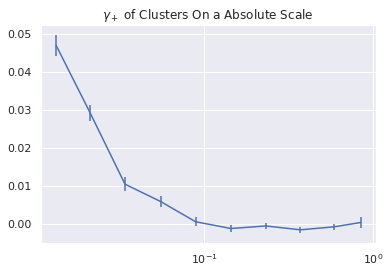

Aggregated xi:
[-74.303  -96.5574 -55.085  -51.7141  -9.4176  25.9487  15.3053  65.555
  29.4032  -5.4108]
------------------------------------------------------------------------------
Aggregated meanlogr:
[ -6837.2894 -12741.6881 -17683.5823 -25022.9427 -34634.3303 -44902.0991
 -50000.6035 -44280.0511 -23113.5132  -1967.1464]
------------------------------------------------------------------------------
Aggregated npairs:
[ 1581.  3300.  5222.  8626. 14304. 23145. 34178. 44766. 43812. 11780.]
------------------------------------------------------------------------------
Mean xi:
[-0.047  -0.0293 -0.0105 -0.006  -0.0007  0.0011  0.0004  0.0015  0.0007
 -0.0005]
------------------------------------------------------------------------------
Mean meanlogr:
[-4.3247 -3.8611 -3.3864 -2.9009 -2.4213 -1.94   -1.4629 -0.9891 -0.5276
 -0.167 ]
------------------------------------------------------------------------------


In [20]:
plt_w_error(mean_abs[1],-mean_abs[0],sig_abs,r"$\gamma_+$ of Clusters On a Absolute Scale ")
print_data(sum_abs,mean_abs)

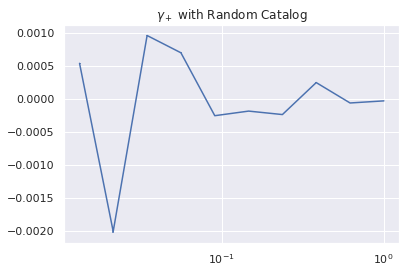

[ 5.3807e-04 -2.0032e-03  9.5860e-04  6.9755e-04 -2.5362e-04 -1.8407e-04
 -2.3639e-04  2.4706e-04 -6.1347e-05 -2.9438e-05]
[-4.8161e-06  1.7930e-05 -8.5802e-06 -6.2436e-06  2.2701e-06  1.6475e-06
  2.1158e-06 -2.2114e-06  5.4910e-07  2.6349e-07]


In [21]:
plt_w_error(r_meanlogr,-r_xi,r_sigma,r"$\gamma_+$ with Random Catalog")
print(-r_xi)
print(r_sigma)

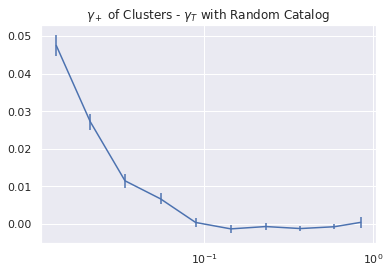

In [22]:
plt_w_error(mean_abs[1],-(mean_abs[0]+r_xi),np.hypot(r_sigma,sig_abs),r"$\gamma_+$ of Clusters - $\gamma_T$ with Random Catalog")

# Rel plots

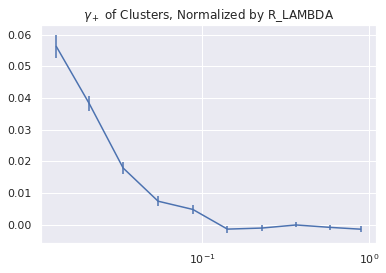

Aggregated xi:
[-48.2611 -91.9896 -74.7871 -49.5946 -53.0429  25.1805  29.6162   3.0997
  39.8865  45.1448]
------------------------------------------------------------------------------
Aggregated meanlogr:
[ -3701.7731  -9299.1904 -14174.0445 -19437.8961 -26724.1269 -35424.4005
 -41547.9307 -40140.647  -25427.5372  -3584.117 ]
------------------------------------------------------------------------------
Aggregated npairs:
[  858.  2410.  4179.  6682. 11001. 18151. 28135. 39970. 47596. 32008.]
------------------------------------------------------------------------------
Mean xi:
[-5.6248e-02 -3.8170e-02 -1.7896e-02 -7.4221e-03 -4.8216e-03  1.3873e-03
  1.0526e-03  7.7550e-05  8.3802e-04  1.4104e-03]
------------------------------------------------------------------------------
Mean meanlogr:
[-4.3144 -3.8586 -3.3917 -2.909  -2.4292 -1.9517 -1.4767 -1.0043 -0.5342
 -0.112 ]
------------------------------------------------------------------------------


<Figure size 432x288 with 0 Axes>

In [23]:
plt_w_error(mean_rel[1],-mean_rel[0],sig_rel,r"$\gamma_+$ of Clusters, Normalized by R_LAMBDA")
print_data(sum_rel,mean_rel)